#### This notebook we will work in Logistic Regression



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import GridSearchCV

%matplotlib inline
SEED = 42

In [11]:
# Read processe file
df = pd.read_csv('../data/processed_transaction.csv')
df.head()

,accountNumber,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,customerId,enteredCVV,...,transactionDateTime_day,transactionDateTime_hour,transactionDateTime_minute,transactionDateTime_second,currentExpDate_year,currentExpDate_month,currentExpDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
0,733493772,3,5000.00,492,9184,0,5000.0,0.00,733493772,492,...,8,19,4,50,2020,4,1,2014,8,3
1,733493772,3,4888.67,492,9184,0,5000.0,111.33,733493772,492,...,9,22,32,39,2023,6,1,2014,8,3
2,733493772,3,4863.92,492,9184,0,5000.0,136.08,733493772,492,...,11,13,36,55,2027,12,1,2014,8,3
3,733493772,3,4676.52,492,9184,0,5000.0,323.48,733493772,492,...,11,22,47,46,2029,9,1,2014,8,3
4,733493772,3,4449.18,492,9184,0,5000.0,550.82,733493772,492,...,16,1,41,11,2024,10,1,2014,8,3


#### Lets separate Level and features, Scaled features



In [12]:
X, y = df.drop(['isFraud'],axis=1), df['isFraud']
# scale the features by standard scaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633846 entries, 0 to 633845
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   accountNumber                  633846 non-null  int64  
 1   acqCountry                     633846 non-null  int64  
 2   availableMoney                 633846 non-null  float64
 3   cardCVV                        633846 non-null  int64  
 4   cardLast4Digits                633846 non-null  int64  
 5   cardPresent                    633846 non-null  int64  
 6   creditLimit                    633846 non-null  float64
 7   currentBalance                 633846 non-null  float64
 8   customerId                     633846 non-null  int64  
 9   enteredCVV                     633846 non-null  int64  
 10  expirationDateKeyInMatch       633846 non-null  int64  
 11  isFraud                        633846 non-null  int64  
 12  merchantCategoryCode          

#### Split data into train test 
 We are spliting data into train and test with ratio 30%. Means 30% test and 70% train data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)

#### Create a logistic regression classifier and fit the model and report accuracy

In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred),5)
precision = round(precision_score(y_test, y_pred),5)
recall = round(recall_score(y_test, y_pred),5)
print('acc: {} precision: {} recal: {}'.format(accuracy, precision, recall))

acc: 0.98249 precision: 0.0 recal: 0.0


#### Cross validation



To eliminate over-fitting, we can apply cross-validation. we are going to apply k-fold cross-validation.

it will split the original data set into k subsets and use one of the subsets as the testing set and the remaining as the training sets. This process iterated k times until every subset have been used as the testing set. Since 10-fold cross-validation is the most popular one, we are going to use that one.

Text(0.5, 1.0, 'Average score: 0.98292283829285')

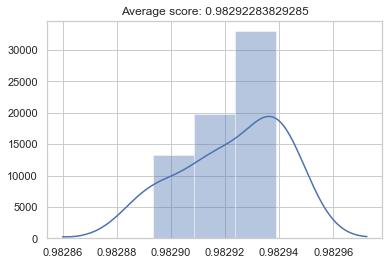

In [17]:
cv_scores = cross_val_score(lr, X_train, y_train, cv=10)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

It looks there is no improvement using cross-validation, as both accuracy score and cross validation look simillar! it seems like we are not suffering from overfit